In [2]:
from matplotlib.figure import Figure
import numpy as np
import pandas as pd

In [3]:
%matplotlib

Using matplotlib backend: module://matplotlib_inline.backend_inline


In [4]:
df = pd.read_csv('1KGQ_common_pop_phased.pca_pop.tsv')

In [5]:
df

,Sample,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,Population
0,HG00096,-0.140881,-0.203935,0.054951,-0.087016,0.047498,-0.024465,-0.004915,-0.011473,-0.004519,0.000323,-0.006680,-0.018694,0.011060,0.041044,0.022598,EUR
1,HG00097,-0.136197,-0.198442,0.055138,-0.084965,0.041788,-0.028087,-0.007568,-0.005111,-0.001248,0.005896,0.006810,-0.023467,-0.007141,0.012325,0.007907,EUR
2,HG00099,-0.138859,-0.201291,0.055497,-0.082521,0.053078,-0.030569,-0.003029,-0.008301,-0.001291,0.006458,0.001141,-0.008160,0.000543,0.005809,0.008561,EUR
3,HG00100,-0.137315,-0.205229,0.056590,-0.083539,0.045053,-0.029023,-0.003541,-0.009467,0.000801,-0.005242,-0.003837,0.000170,-0.002160,0.009181,0.015159,EUR
4,HG00101,-0.141031,-0.197774,0.057060,-0.080654,0.049917,-0.028171,-0.006650,-0.011328,-0.004472,-0.005109,-0.024583,-0.018139,0.015378,0.017544,0.018087,EUR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3306,SRR2098281,0.149159,-0.057710,-0.004392,-0.033751,-0.204844,-0.056151,0.010706,-0.008048,0.061530,0.024621,-0.002349,0.007147,-0.002185,0.013395,0.004347,QAT
3307,SRR2098282,0.205269,-0.026365,-0.013125,-0.024765,-0.172366,-0.061731,0.019922,-0.004868,0.066822,0.028567,-0.001569,0.009142,-0.005627,0.010502,0.002432,QAT
3308,SRR2098283,0.236483,-0.013873,-0.009753,-0.018901,-0.169896,-0.059507,0.016880,-0.004596,0.107744,0.035370,-0.001892,0.005325,0.001309,0.020930,0.007874,QAT
3309,SRR2098284,0.048489,-0.090803,-0.011903,-0.038192,-0.204255,-0.043487,-0.004802,-0.002595,0.044234,0.026014,-0.001183,0.003712,0.000318,0.012901,0.007580,QAT


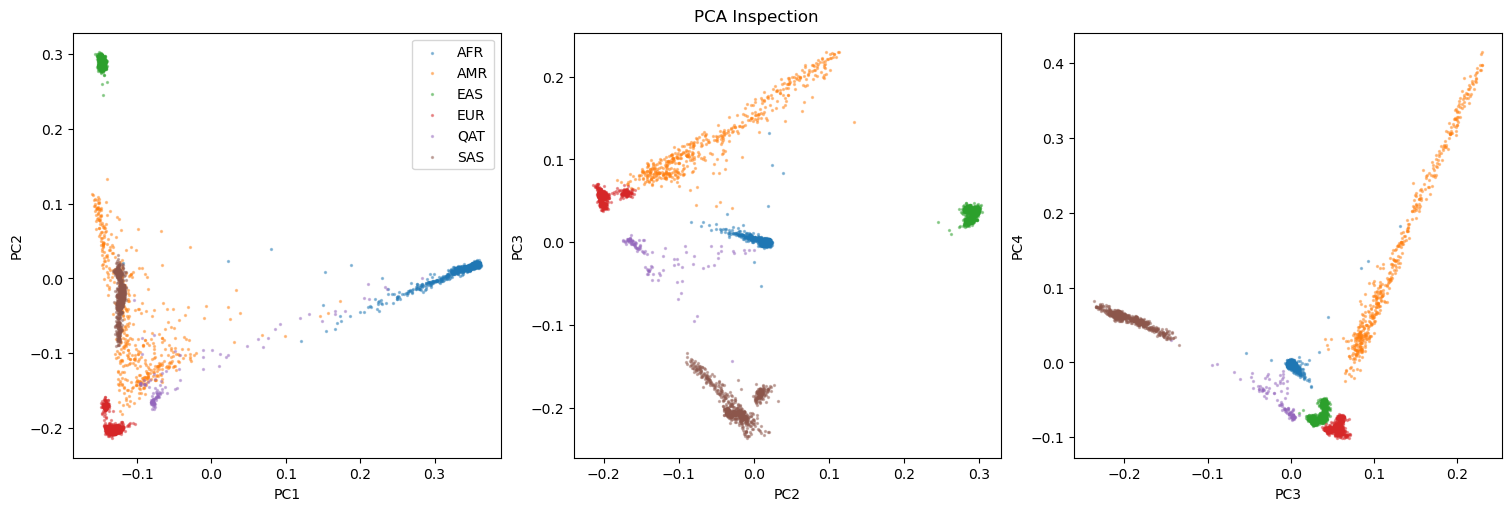

In [7]:
fig = Figure(figsize=(15,5), layout='constrained')
axs = fig.subplots(1,3, squeeze=True)

for i, j in [[1,2], [2,3], [3,4]]:
  PCi = 'PC' + str(i)
  PCj = 'PC' + str(j)
  for n, p in df.groupby('Population'):
    axs[i-1].scatter(p[PCi], p[PCj], label=n, s=2, alpha=0.4)
  axs[i-1].set(xlabel=PCi, ylabel=PCj)
axs[0].legend()
fig.suptitle('PCA Inspection')
fig

In [ ]:
# immunotherapy cohort from Baihe
# arab breast cancer
